<a href="https://colab.research.google.com/github/HanlunAI/ATasteOfDeepLearning/blob/main/ST5_Variants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. Some common surfaces**

In [ ]:
import numpy as np
# Make data.
n = 500
X = np.linspace(-5, 5, n, endpoint = False)
Y = np.linspace(-5, 5, n, endpoint = False)
X, Y = np.meshgrid(X, Y)
Z = np.dstack(X + Y)
Z = np.append(Z,np.dstack(X**2 + Y**2 - 10), axis = 0)
Z = np.append(Z,np.dstack(-X**2 - Y**2 + 10), axis = 0)
Z = np.append(Z,np.dstack(X**2 - 10), axis = 0)
Z = np.append(Z,np.dstack(X**2 + 2*Y**2-50), axis = 0)
Z = np.append(Z,np.dstack(2*X**2 + Y**2-50), axis = 0)
Z = np.append(Z,np.dstack(X**2 - Y**2), axis = 0)#pringles, saddle point
Z = np.append(Z,np.dstack(X*Y - 10), axis = 0)#it's actually a doubly-ruled surface
Z = np.append(Z,np.dstack(10/(X**2+Y**2+1)), axis = 0)
Z = np.append(Z,np.dstack(10*np.exp(-X**2+-Y**2)), axis = 0)
Z = np.append(Z,np.dstack(5*np.sin(X)), axis = 0)
Z = np.append(Z,np.dstack(5*np.sin(X)*np.sin(Y)), axis = 0)
Z = np.append(Z,np.dstack(5*np.sin(X+Y)), axis = 0)
Z = np.append(Z,np.dstack(5*np.sin(X*Y)), axis = 0)
Z = np.append(Z,np.dstack(5*np.sin(X**2+Y**2)), axis = 0)
Z = np.append(Z,np.dstack(5*np.sin(np.sqrt(X**2+Y**2))), axis = 0)

toDisplay = ["$$z = x+y$$",
             "$$z = x^2+y^2-10$$",
             "$$z = -x^2-y^2+10$$",
             "$$z = x^2-10$$",
             "$$z = x^2+2y^2-50$$",
             "$$z = 2x^2+y^2-50$$",
             "$$z = x^2-y^2$$", #pringles, saddle point
             "$$z = xy - 10$$", #it's actually a doubly-ruled surface
             "$$z = \\frac{10}{x^2+y^2+1}$$",
             "$$z = 10 e^{-x^2-y^2}$$",
             "$$z = 5\\sin x$$",
             "$$z = 5\\sin(x)\\sin(y)$$",
             "$$z = 5\\sin(x+y)$$",
             "$$z = 5\\sin(xy)$$",
             "$$z = 5\\sin(x^2+y^2)$$",
             "$$z = 5\\sqrt{\\sin(x^2+y^2)}$$"]

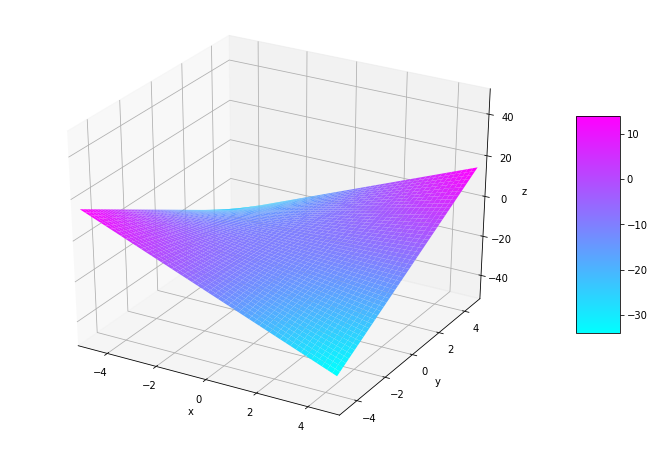

<IPython.core.display.Latex object>

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, Latex

#@title Select values of surface and color scheme below and run the result { run: "auto" }
ChooseSurface = 7#@param{type:"slider", max:30, min:0, step:"1"}

color = "cool" #@param ["hot", "cool"]


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.set_figheight(8)
fig.set_figwidth(12)

choices = Z.shape[0]


choice = ChooseSurface%choices
# Plot the surface.
surf = ax.plot_surface(X, Y, Z[choice], cmap=color)
# Customize the z axis.

ax.set_xlim3d([-5, 5])
ax.set_ylim3d([-5, 5])
ax.set_zlim(-50,50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

#ax.view_init(70, -70)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

display(Latex(toDisplay[choice]))

**B. 3D t-SNE**

Taking a really really long time to run...

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


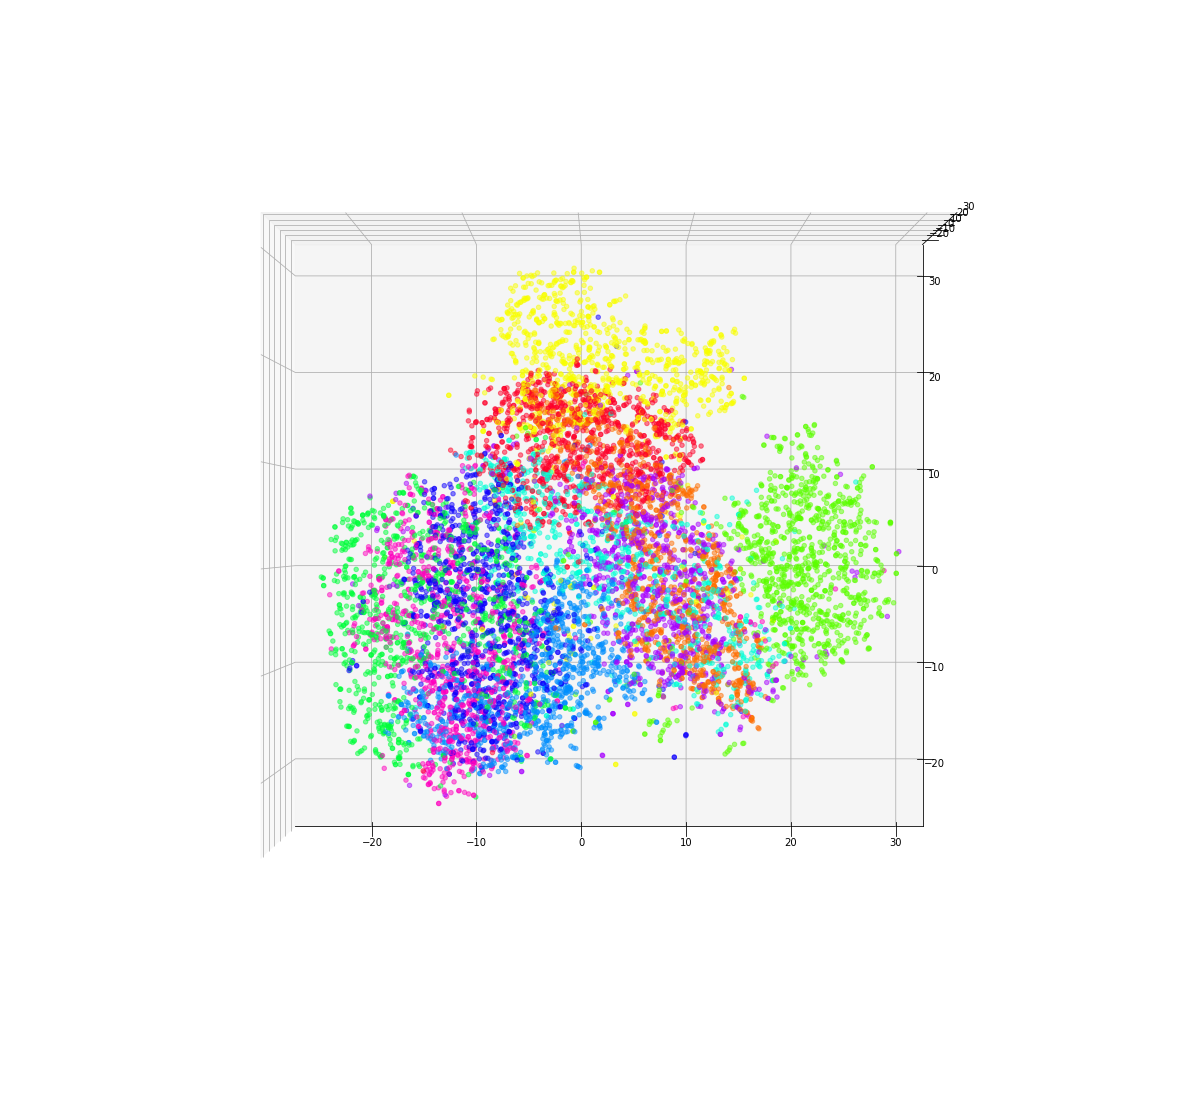

In [ ]:
from numpy import random
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
inpect_points = 1000
x_t = np.reshape(x_train, (60000, 28*28))
y_t = np.reshape(y_train, (60000, 1))
idx = np.random.randint(60000,size = 10000)
train = np.concatenate((y_t[idx,:], x_t[idx,:]),axis=1)
tsne3 = TSNE(n_components = 3)
tsne_res3 = tsne3.fit_transform(train)
fig, ax = plt.subplots(figsize=(21,20))
ax = plt.axes(projection='3d')
ax.view_init(90, -90)
ax.scatter3D(xs = tsne_res3[:,0], ys = tsne_res3[:,1], zs = tsne_res3[:,2], c=train[:,0], cmap='gist_rainbow', alpha=0.5)

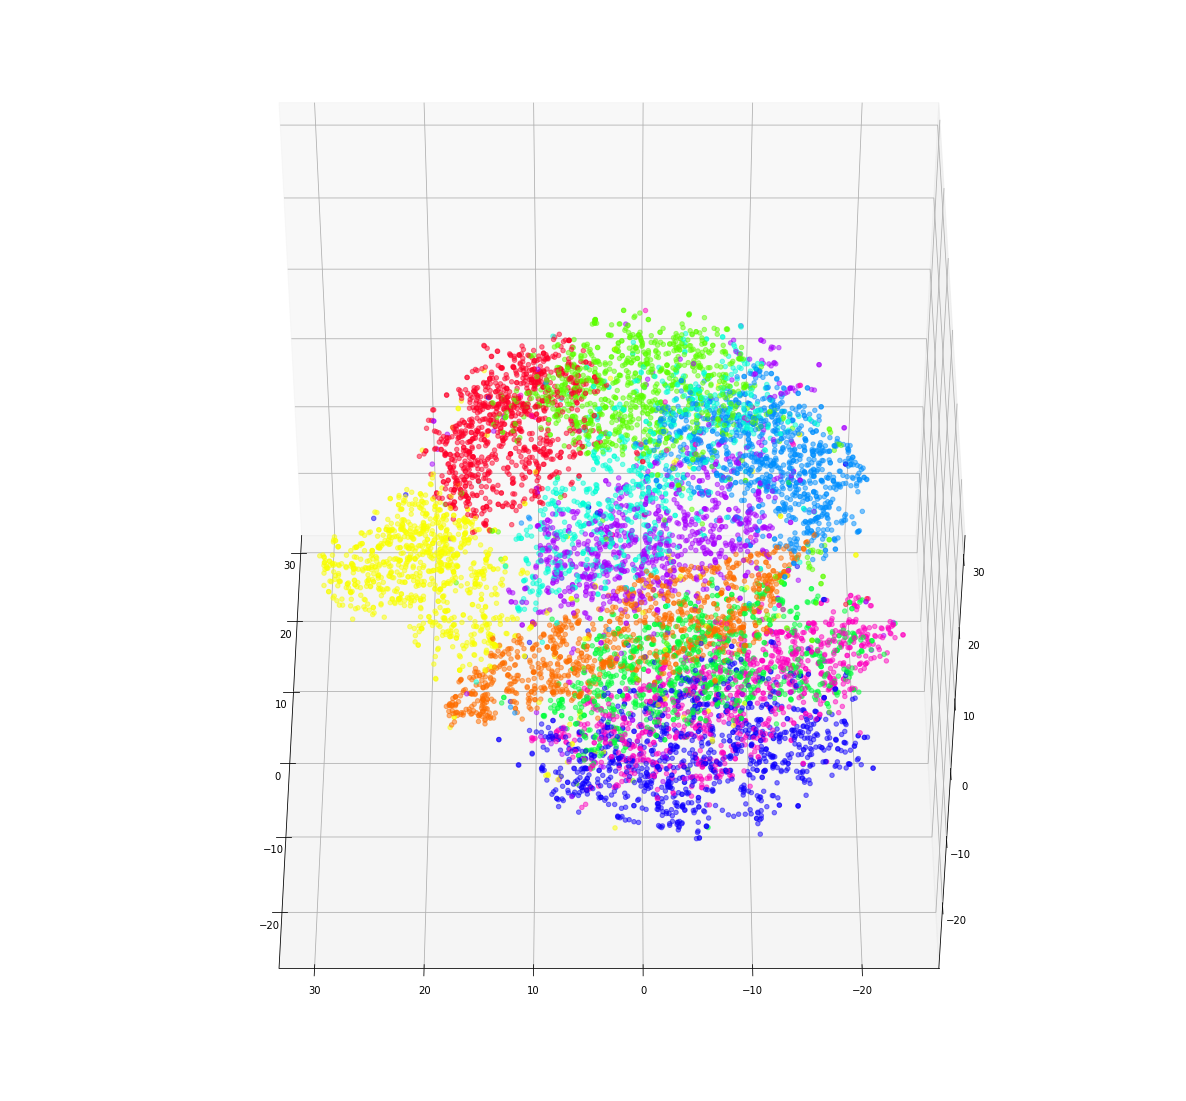

In [ ]:
#other perspectives, upon successful execution the previous cell

fig, ax = plt.subplots(figsize=(21,20))
ax = plt.axes(projection='3d')
#FrontView
#ax.view_init(90, -90)

#SideViewLeft
ax.view_init(45, 180)

#SideViewRight
#ax.view_init(45, 0)

#VerticalTopView
#ax.view_init(0, 90)

#VerticalView
#ax.view_init(5, 90)

#interesting
#ax.view_init(0, 45)

ax.scatter3D(xs = tsne_res3[:,0], ys = tsne_res3[:,1], zs = tsne_res3[:,2], c=train[:,0], cmap='gist_rainbow', alpha=0.5)